✅ Root found at x = 4.965114


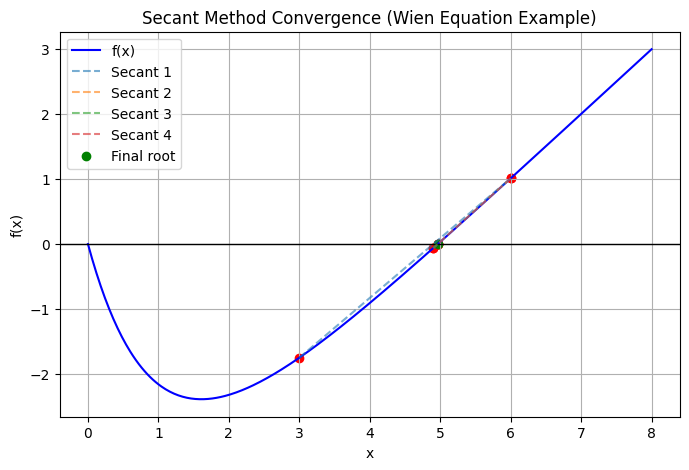

In [ ]:
# --- Secant Method Tutorial ---
# 🌟 Example: Solving a transcendental equation from blackbody radiation
# Wien's displacement equation:  5*e^(-x) + x - 5 = 0
#where x = hv/kT
#This transcendental equation cannot be solved analytically,  
#because x appears both inside and outside the exponential term.
#Therefore, numerical root-finding techniques—such as the Secant Method—are required to determine its solution.

# Goal: Find x numerically using the Secant method

import numpy as np
import matplotlib.pyplot as plt

# --- Step 1: Define the function ---
def f(x):
    """Wien's displacement function"""
    return 5*np.exp(-x) + x - 5

# --- Step 2: Secant method implementation ---
def secant_method(f, x0, x1, tol=1e-6, max_iter=50):
    history = [x0, x1]
    for i in range(max_iter):
        f0, f1 = f(x0), f(x1)
        
        # Avoid division by zero
        if abs(f1 - f0) < 1e-12:
            print("Denominator too small — stopping iteration.")
            break
        
        # Secant formula
        x2 = x1 - f1 * (x1 - x0) / (f1 - f0)
        history.append(x2)
        
        # Check for convergence
        if abs(x2 - x1) < tol:
            break
        
        # Shift points
        x0, x1 = x1, x2
        
    return x2, history

# --- Step 3: Choose two initial guesses ---
x0, x1 = 3.0, 6.0  # starting points that roughly bracket the root

# --- Step 4: Run the Secant method ---
root, hist = secant_method(f, x0, x1)
print(f"✅ Root found at x = {root:.6f}")

# --- Step 5: Visualization ---
x_vals = np.linspace(0, 8, 400)
plt.figure(figsize=(8,5))
plt.plot(x_vals, f(x_vals), label='f(x)', color='blue')
plt.axhline(0, color='black', linewidth=1)

# Plot secant lines for first few iterations
for i in range(min(4, len(hist)-2)):
    x_i, x_ip1 = hist[i], hist[i+1]
    y_i, y_ip1 = f(x_i), f(x_ip1)
    secant_x = np.linspace(x_i, x_ip1, 50)
    slope = (y_ip1 - y_i) / (x_ip1 - x_i)
    secant_y = y_i + slope * (secant_x - x_i)
    plt.plot(secant_x, secant_y, '--', alpha=0.6, label=f"Secant {i+1}")
    plt.scatter([x_i, x_ip1], [y_i, y_ip1], color='red')

# Mark final root
plt.scatter(hist[-1], f(hist[-1]), color='green', label='Final root')
plt.title("Secant Method Convergence (Wien Equation Example)")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid(True)
plt.show()

# --- Step 6: Discussion ---
# 💡 The Secant method uses two initial guesses (x0, x1)
#    and approximates the derivative by a finite difference.
# 🚀 It often converges faster than Bisection, and does not require f'(x).
# ⚠️ However, it may fail or oscillate if the initial guesses are poorly chosen.
# Try changing (x0, x1) and observe the effect.
# JUST DO IT! (NIKE LOGO SHAPE f(x))
# This demonstrates one of the limitations of the Secant method.
